# 제목을 단어 단위로 분해한 데이터를 집계해 머신러닝 모델에 적용시키기

- 각 뉴스 기사의 제목을 따와 KoNLPy로 분해하기 (단어 단위)
- 각 단어를 하나의 컬럼명으로 지정한 새로운 테이블 word_count_t 생성
    - 각 레코드(행)는 뉴스 기사 하나의 데이터
    - 
- word_count_t의 앞쪽에 각 뉴스 기사의 날짜, 제목 컬럼을 추가

In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


In [3]:
# '-' 깨짐 해결 모듈
import matplotlib.pylab as plt

import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


## 데이터 읽기

In [4]:
df_cwn = pd.read_csv('../know_arc_pjt/data_crawling_D/data_sql_edited/sql_cwn_data_202306211447.csv')
print(df_cwn.shape)

(1655, 8)


In [5]:
# itbiz
df_itbiz_policy = pd.read_csv('../know_arc_pjt/data_crawling_D/data_sql_edited/sql_itbiz_policy_data_202306211447.csv')
df_itbiz_compin = pd.read_csv('../know_arc_pjt/data_crawling_D/data_sql_edited/sql_itbiz_computing_data_202306211447.csv')
df_itbiz_netw = pd.read_csv('../know_arc_pjt/data_crawling_D/data_sql_edited/sql_itbiz_network_data_202306211447.csv')
df_itbiz_secur = pd.read_csv('../know_arc_pjt/data_crawling_D/data_sql_edited/sql_itbiz_security_data_202306211447.csv')
print(df_itbiz_policy.shape, df_itbiz_compin.shape, df_itbiz_netw.shape, df_itbiz_secur.shape)

(727, 8) (920, 8) (347, 8) (300, 8)


In [6]:
# bloter
df_bloter_pp = pd.read_csv('../know_arc_pjt/data_crawling_D/data_sql_edited/sql_bloter_p_data_202306211447.csv')
df_bloter_tech = pd.read_csv('../know_arc_pjt/data_crawling_D/data_sql_edited/sql_bloter_t_data_202306211447.csv')
print(df_bloter_pp.shape, df_bloter_tech.shape)

(184, 8) (9, 8)


In [7]:
# techworld
df_techworld_ai = pd.read_csv('../know_arc_pjt/data_crawling_D/data_sql_edited/sql_techworld_ai_data_202306211447.csv')
df_techworld_compiot = pd.read_csv('../know_arc_pjt/data_crawling_D/data_sql_edited/sql_techworld_emb_data_202306211447.csv')
print(df_techworld_ai.shape, df_techworld_compiot.shape)

(715, 8) (1086, 8)


In [8]:
# 요즘 IT
df_recentit = pd.read_csv('../know_arc_pjt/data_crawling_D/data_sql_edited/sql_recentit_data_202306211447.csv')
print(df_recentit.shape)

(335, 9)


In [9]:
# IT_WORLD
df_itworld = pd.read_csv('../know_arc_pjt/data_crawling_D/data_sql_edited/sql_itworld_data_202306211447.csv')
print(df_itworld.shape)

(363, 9)


## 데이터 형상 파악하기

In [10]:
df_cwn.head()


,idx,news_date,news_title,news_text_sm,url_in,news_writer,tags_string,thumb_addr
0,52,2023.05.30 17:10,웹3 메타버스 캐리버스 시네마틱 공개와 동시에 사전예약 돌입,㈜캐리버스가 웹3 메타버스 게임 ‘캐리버스’의 인게임 시네마틱 영상을 공개하며 글로...,https://www.cwn.kr/news/articleView.html?idxno...,김지영,"#캐리버스,#블록체인,#웹3 메타버스",https://www.cwn.kr/news/thumbnail/202305/16873...
1,53,2023.05.30 13:15,한국레노버 8세대 요가 신제품 3종 출시,레노버 요가 프로 9i한국레노버(대표 신규식)가 콘텐츠 크리에이터를 위한 뛰어난 성...,https://www.cwn.kr/news/articleView.html?idxno...,온라인뉴스팀,"#한국레노버,#노트북,#요가 프로 9i,#요가 프로 7i,#요가 슬림 7i 카본",https://www.cwn.kr/news/thumbnail/202305/mn_16...
2,54,2023.05.30 13:14,SK텔레콤 양자보안 폰 ‘갤럭시 퀀텀4’ 출시,SK텔레콤(대표이사 사장 유영상)은 삼성전자와 함께 양자보안 5G 스마트폰 ‘갤럭시...,https://www.cwn.kr/news/articleView.html?idxno...,온라인뉴스팀,"#SK텔레콤,#삼성전자,#양자보안 5G 스마트폰,#갤럭시 퀀텀 4",NaN
3,55,2023.05.30 12:07,Arm 차세대 GPU·CPU 공개…모바일 기기 성능 업그레이드 기대,출처: Arm로이터 테크크런치 더레지스터 등 복수 외신은 칩 제조사 Arm이 컴퓨텍...,https://www.cwn.kr/news/articleView.html?idxno...,최은희,"#Arm,#Arm Cortex-X4,#Arm Immortalis-G720,#TCS23",https://www.cwn.kr/news/thumbnail/202305/16863...
4,56,2023.05.30 10:12,아이폰16 프로 모델 2종 디스플레 크기 커질까?,출처: Apple맥루머스 GSM 아레나 등 복수 외신은 아이폰 16 프로 모델의 화...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#애플,#아이폰,#아이폰16 프로,#아이폰16 프로맥스",https://www.cwn.kr/news/thumbnail/202305/16861...


In [11]:
df_cwn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idx           1655 non-null   int64 
 1   news_date     1655 non-null   object
 2   news_title    1655 non-null   object
 3   news_text_sm  1654 non-null   object
 4   url_in        1655 non-null   object
 5   news_writer   1655 non-null   object
 6   tags_string   1501 non-null   object
 7   thumb_addr    1634 non-null   object
dtypes: int64(1), object(7)
memory usage: 103.6+ KB


In [12]:
df_cwn.describe()

,idx
count,1655.000000
mean,879.000000
std,477.901664
min,52.000000
25%,465.500000
50%,879.000000
75%,1292.500000
max,1706.000000


In [13]:
df_cwn.columns


Index(['idx', 'news_date', 'news_title', 'news_text_sm', 'url_in',
       'news_writer', 'tags_string', 'thumb_addr'],
      dtype='object')

In [14]:
# df_recentit news_date 수정하기 (맨우측에 . 삭제)
df_recentit['news_date']= df_recentit['news_date'].str.replace(pat=r'[^\w]',repl=r'',regex=True)
df_recentit['news_date']

# [ 출처: https://seong6496.tistory.com/ ]

0      20230405
1      20230404
2      20230403
3      20230330
4      20230328
         ...   
330    20220614
331    20220613
332    20220609
333    20220603
334    20220603
Name: news_date, Length: 335, dtype: object

In [15]:
# news_date의 dtype을 datetime으로
df_list = [df_cwn, df_itbiz_policy, df_itbiz_compin, df_itbiz_netw, df_itbiz_secur, df_bloter_pp, df_bloter_tech, df_techworld_ai, df_techworld_compiot, df_recentit, df_itworld]
i = 0
while i <=10 :
    df_list[i]['news_date'] = pd.to_datetime(df_list[i]['news_date'])
    df_list[i]['news_date'] = df_list[i]['news_date'].dt.strftime('%Y.%m.%d')
    df_list[i] = df_list[i].drop(['idx'],axis=1)
    i += 1
# for df in df_list:
#     # print(type(df))
#     # df = pd.to_datetime(df)
#     df = df.dt.strftime('%Y.%m.%d')
df_cwn = df_list[0]
df_itbiz_policy = df_list[1]
df_itbiz_compin = df_list[2]
df_itbiz_netw = df_list[3]
df_itbiz_secur = df_list[4]
df_bloter_pp = df_list[5]
df_bloter_tech = df_list[6]
df_techworld_ai = df_list[7]
df_techworld_compiot = df_list[8]
df_recentit = df_list[9]
df_itworld = df_list[10]

In [16]:
df_itbiz_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   news_date     727 non-null    object
 1   news_title    727 non-null    object
 2   news_text_sm  727 non-null    object
 3   url_in        727 non-null    object
 4   news_writer   727 non-null    object
 5   tags_string   726 non-null    object
 6   thumb_addr    726 non-null    object
dtypes: object(7)
memory usage: 39.9+ KB


## 특정 언론사들의 데이터 테이블을 합치기

In [17]:
# itbiz 네 개의 탭 합치기
df_itbiz = pd.concat([df_itbiz_policy, df_itbiz_compin, df_itbiz_netw, df_itbiz_secur], ignore_index=True)
df_itbiz.sort_values(by=['news_date'], ascending=False)
df_itbiz.reset_index(drop=True)
df_itbiz.fillna('')

,news_date,news_title,news_text_sm,url_in,news_writer,tags_string,thumb_addr
0,2023.05.30,레드햇·한전KDN 전력·에너지 분야 공동 신사업 추진,레드햇이 한전KDN과 클라우드 기반 기술 강화를 골자로 하는 업무협약을 체결하고 협...,https://www.itbiznews.com//news/articleView.ht...,오현식,"#공공 클라우드,#에너지 클라우드,#한전KDN,#레드햇",https://www.cwn.kr./thumbnail/202305/100508_96...
1,2023.05.29,전경련 “자사주 소각 의무화 기업 경영권 위협할 수도”,자사주 소각 의무화가 기업경영에 부정적 영향이 있는 만큼 규제 도입에 신중해야 한다...,https://www.itbiznews.com//news/articleView.ht...,박인환,"#지분,#자사주,#공시,#주주환원책,#코리아 디스카운트,#경영권 방어,#전경련",https://www.cwn.kr./thumbnail/202305/100492_96...
2,2023.05.27,구글코리아 기보·기업은행과 크리에이터 성장지원 파트너십,구글코리아가 기술보증기금 IBK기업은행과 크리에이터 성장지원을 위한 파트너십을 구축...,https://www.itbiznews.com//news/articleView.ht...,오현식,"#유튜브 크리에이터,#기술보중기금,#구글코리아,#창작자 지원,#IBK기업은행",https://www.cwn.kr./thumbnail/202305/100434_96...
3,2023.05.26,디자인보호법 일부개정안 국회 본회의 통과,디자인보호법 일부개정안이 25일 국회 본회의를 통과했다. 개정안은 공포 후 6개월이...,https://www.itbiznews.com//news/articleView.ht...,김소현,"#디자인보호법,#개정안,#지재권,#IP,#특허출원,#특허청",https://www.cwn.kr./thumbnail/202305/100328_96...
4,2023.05.26,“클라우드 벤더 선택 1순위는 보안”,알리바바클라우드가 기업의 클라우드 선택에 있어 가장 중요한 고려사항은 ‘보안’이라고...,https://www.itbiznews.com//news/articleView.ht...,오현식,"#알리바바클라우드,#클라우드,#클라우드 보안",https://www.cwn.kr./thumbnail/202305/100255_96...
...,...,...,...,...,...,...,...
2289,2022.06.12,아크로니스 DLP 통합한 ‘사이버 프로텍트 클라우드’ 출시,아크로니스는 데이터 유출 방지(DLP) 기능을 결합한 ‘아크로니스 사이버 프로텍트 ...,https://www.itbiznews.com//news/articleView.ht...,오현식,"#아크로니스,#데이터유출방지,#DLP",https://www.cwn.kr./thumbnail/202206/73113_677...
2290,2022.06.09,시큐아이 AI 기반 보안위협분석 플랫폼 ‘스틱’ 공개,시큐아이가 9일 고도화된 보안 위협을 빠르게 탐지하고 사전에 대응하기 위해 인공지능...,https://www.itbiznews.com//news/articleView.ht...,오현식,"#시큐아이,#위협분석,#AI 위협분석,#인공지능",https://www.cwn.kr./thumbnail/202206/73081_677...
2291,2022.06.08,맨디언트 인테로스와 MOU…공급망 사이버 리스크 관리 고도화,맨디언트가 운영·공급망 리스크 관리 기업 인테로스와 전략적 파트너십을 체결하고 공급...,https://www.itbiznews.com//news/articleView.ht...,오현식,"#보안,#네트워크,#지능형위협,#SaaS,#인테로스,#맨디언트",https://www.cwn.kr./thumbnail/202206/73004_676...
2292,2022.06.03,로그프레소 S2W와 보안 인텔리전스 사업 ‘맞손’…MOU 체결,보안운영(SecOps) 플랫폼 기업 로그프레소가 사이버위협 인텔리전스 전문기업 에스...,https://www.itbiznews.com//news/articleView.ht...,오현식,"#보안,#정보자산,#지능형위협,#섹옵스,#SecOps,#S2W,#로그프레소",https://www.cwn.kr./thumbnail/202206/72935_675...


In [18]:
# bloter 두 개의 탭 합치기
df_bloter = pd.concat([df_bloter_pp, df_bloter_tech], ignore_index=True)
df_bloter.sort_values(by=['news_date'], ascending=False)
df_bloter.reset_index(drop=True)
df_bloter.fillna('')

,news_date,news_title,news_text_sm,url_in,news_writer,tags_string,thumb_addr
0,2023.05.25,"지그재그 팝업 스토어, '백문이 불여일견' [현장+]",기자는 끊을 수 없을 만큼 인터넷 쇼핑에 길들여졌다. 하지만 취재나 여가를 즐기며 ...,https://www.bloter.net/news/articleView.html?i...,안신혜 기자,"#카카오스타일,#지그재그,#온라인플랫폼,#패션플랫폼,#더현대서울,#팝업스토어",https://cdn.bloter.net/news/thumbnail/202305/6...
1,2023.05.24,지그재그도 앱 밖으로 나왔다…팝업 스토어 운영 차별점은?,카카오스타일의 스타일 커머스 플랫폼 지그재그가 애플리케이션에서 나와 더현대 서울에 ...,https://www.bloter.net/news/articleView.html?i...,안신혜 기자,"#패션플랫폼,#커머스,#지그재그,#카카오스타일,#더현대서울,#팝업스토어",https://cdn.bloter.net/news/thumbnail/202305/6...
2,2023.05.23,"네이버·카카오 '뉴스제평위 중단'에 뿔난 인터넷신문…""심사 재개 일정 공개하라""",네이버와 카카오가 최근 뉴스제휴 심사를 무기한 중단한 가운데 인터넷신문들이 뉴스제휴...,https://www.bloter.net/news/articleView.html?i...,박현준 기자,"#네이버,#카카오,#뉴스제휴평가위원회",https://cdn.bloter.net/news/thumbnail/202305/6...
3,2023.05.22,"네이버·카카오, '뉴스제평위' 잠정 중단…새 제휴 모델 찾는다",네이버·카카오가 언론사의 뉴스 제휴 평가 시스템 개선 방안을 모색하기 위해 '뉴스제...,https://www.bloter.net/news/articleView.html?i...,정병연 기자,"#네이버,#카카오,#뉴스,#뉴스제휴평가위원회",https://cdn.bloter.net/news/thumbnail/202305/6...
4,2023.05.17,카카오가 카톡 '오픈채팅'을 별도 탭으로 옮긴 이유는,카카오가 메신저 서비스 카카오톡(이하 카톡)의 '오픈채팅'을 별도 탭으로 신설했다....,https://www.bloter.net/news/articleView.html?i...,정병연 기자,"#카카오,#카카오톡,#오픈채팅",https://cdn.bloter.net/news/thumbnail/202305/6...
...,...,...,...,...,...,...,...
188,2022.08.28,[함께 쓰는 풀리퀘]더 나은 이름과 메타포를 향하여②,‘풀리퀘’는 깃허브에서 타인의 코드에 리뷰를 요청하는 기능인 ‘풀 리퀘스트’의 줄임...,https://www.bloter.net/news/articleView.html?i...,이건한,"#풀리퀘,#개발,#코딩,#소스코드,#명명규칙,#변수,#자바스크립트,#메타포",https://cdn.bloter.net/news/thumbnail/202208/4...
189,2022.08.13,[함께 쓰는 풀리퀘] AI 학회 이름이 ‘청소년 유해 검색 결과'였던 사연,‘풀리퀘’는 깃허브에서 타인의 코드에 리뷰를 요청하는 기능인 ‘풀 리퀘스트’의 줄임...,https://www.bloter.net/news/articleView.html?i...,이건한,"#풀리퀘,#NIPS,#AI,#학회,#메타포,#이름,#비유,#은유",https://cdn.bloter.net/news/thumbnail/202208/4...
190,2022.07.27,"""쓸까, 말까…"" 혼란 가중된 휴대용 선풍기 전자파 논란, 쟁점은?",휴대용 목·손 선풍기에서 발생하는 전자파의 인체 유해성 여부를 두고 환경보건시민센터...,https://www.bloter.net/news/articleView.html?i...,이건한,"#환경보건시민센터,#과기정통부,#목선풍기,#손선풍기,#휴대용선풍기,#전자파",https://cdn.bloter.net/news/thumbnail/202207/4...
191,2022.07.02,"[함께 쓰는 풀리퀘]기계도, 사람도 읽을 수 있는 문서는?③",‘풀리퀘’는 깃허브에서 타인의 코드에 리뷰를 요청하는 기능인 ‘풀 리퀘스트’의 줄임...,https://www.bloter.net/news/articleView.html?i...,이건한,"#풀리퀘,#ODF,#문서표준,#영국,#오피스,#오픈소스",https://cdn.bloter.net/news/thumbnail/202207/4...


In [19]:
# techworld 두 개의 탭 합치기
df_techworld = pd.concat([df_techworld_ai, df_techworld_compiot], ignore_index=True)
df_techworld.sort_values(by=['news_date'], ascending=False)
df_techworld.reset_index(drop=True)
df_techworld.fillna('')

,news_date,news_title,news_text_sm,url_in,news_writer,tags_string,thumb_addr
0,2023.05.30,"KT, 롯데온 AI ‘리스포’ 적용…유통 물류 혁신 가속화",KT가 롯데그룹의 e커머스 플랫폼인 롯데온과 손잡고 인공지능(AI)과 빅데이터 기반...,https://www.epnc.co.kr/news/articleView.html?i...,양승갑 기자,,https://cdn.epnc.co.kr/news/thumbnail/202305/2...
1,2023.05.26,"올림플래닛-펫포레스트, 반려동물 메타버스 장례 서비스 선보여",올림플래닛은 반려동물 장례식장 펫포레스트와 반려동물 메타버스 장례 서비스 구축을 위...,https://www.epnc.co.kr/news/articleView.html?i...,양승갑 기자,,https://cdn.epnc.co.kr/news/thumbnail/202305/2...
2,2023.05.26,"컴투버스, 정부 주관 ‘실감콘텐츠 핵심기술 개발사업’ 공동연구기관 선정",컴투스의 메타버스 전문 기업 컴투버스는 과학기술정보통신부에서 지원하는 ‘실감콘텐츠 ...,https://www.epnc.co.kr/news/articleView.html?i...,양승갑 기자,,https://cdn.epnc.co.kr/news/thumbnail/202305/2...
3,2023.05.25,"무하유, 서울관광재단에 AI 서류평가 ‘프리즘’ 제공",실용 인공지능(AI) 기술 기업 무하유가 자사 AI 서류평가 서비스 '프리즘'을 서...,https://www.epnc.co.kr/news/articleView.html?i...,양승갑 기자,,https://cdn.epnc.co.kr/news/thumbnail/202305/2...
4,2023.05.25,"뤼튼, 아시아 생성AI 컨퍼런스 ‘GAA 2023’ 31일 개최",올인원 AI(인공지능) 플랫폼 ‘뤼튼테크놀로지스(뤼튼)’가 오는 31일 그랜드 인터...,https://www.epnc.co.kr/news/articleView.html?i...,양승갑 기자,,https://cdn.epnc.co.kr/news/thumbnail/202305/2...
...,...,...,...,...,...,...,...
1796,2022.05.31,"KOSA, 제5회 SW 런앤그로우 포럼 개최",최근 ESG경영이 산업계 큰 이슈로 떠오르면서 IT업계도 ESG경영에 대한 의견을 ...,https://www.epnc.co.kr/news/articleView.html?i...,조명의 기자,,https://cdn.epnc.co.kr/news/thumbnail/202205/2...
1797,2022.05.31,"알리바바 클라우드, 퍼블릭 클라우드 IaaS 공급업체 시장 점유율 세계 3위",알리바바 클라우드는 시장조사기관 IDC(International Data Corpo...,https://www.epnc.co.kr/news/articleView.html?i...,정재민 기자,,https://cdn.epnc.co.kr/news/thumbnail/202205/2...
1798,2022.05.31,"다우데이타, 아크로니스 통합보호솔루션 어드밴스드팩 무상 프로모션 진행",아크로니스 국내 총판 다우데이타는 아크로니스의 사이버프로텍트 클라우드 어드밴스드 기...,https://www.epnc.co.kr/news/articleView.html?i...,조명의 기자,,https://cdn.epnc.co.kr/news/thumbnail/202205/2...
1799,2022.05.31,"워크데이, 1분기 매출 14억 3000만 달러로 전년비 22.1% 증가",워크데이는 지난달 30일자로 마감된 2023 회계년도 1분기 실적을 발표했다.202...,https://www.epnc.co.kr/news/articleView.html?i...,정재민 기자,,https://cdn.epnc.co.kr/news/thumbnail/202205/2...


In [20]:
# 요즘IT와 IT_WORLD 결측값 채우기
df_recentit.fillna('')
df_itworld.fillna('')

,news_date,news_title,news_text_sm,url_in,news_writer,tags_string,thumb_addr,news_key
0,2022.05.31,타입스크립트 4.7 출시…“노드.js 16용 ESM 지원”,‘타입스크립트 4.7(TypeScript 4.7)’이 프로덕션 릴리즈로 출시됐다. ...,https://www.itworld.co.kr/t/61023/%EA%B0%9C%EB...,Anirban Ghoshal?,,https://www.itworld.co.kr/files/ciokr/2022/05/...,마이크로소프트
1,2022.06.02,"유니티, ‘MWU 코리아 어워드 2022’ 개최…7월 1일부터 접수 시작",유니티 코리아가 국내 유니티 크리에이터를 위한 ‘MWU 코리아 어워드 2022(Ma...,https://www.itworld.co.kr/t/61023/%EA%B0%9C%EB...,Matthew Tyson,,https://www.itworld.co.kr/files/itworld/ITW_20...,유니티
2,2022.06.02,"프론트엔드 아키텍처의 진화, 리액티브 자바스크립트",현재 소프트웨어 개발에서 가장 역동적인 분야는 프론트 엔드 아키텍처다. 동적인 사용...,https://www.itworld.co.kr/t/61023/%EA%B0%9C%EB...,Josh Fruhlinger,,https://www.itworld.co.kr/files/itworld/ITW_20...,자바스크립트
3,2022.06.02,데이터가 서말이라도 '쉬워야' 꿴다…전천후 멀티툴 '파이썬'이 뜬다,파이썬은 R을 넘어서지는 못했을 수 있다. 하지만 사용 편의성과 이에 힘입은 인기 ...,https://www.itworld.co.kr/t/61023/%EA%B0%9C%EB...,Lucas Mearian,,https://www.itworld.co.kr/files/ciokr/2022/05/...,파이썬
4,2022.06.02,개발·전략 모두 할 수 있다면··· ‘코딩 리더’에 주목할 이유,"개발자의 정년은 짧아서 관리직 전환만이 유일한 전망이며, 이러한 전환은 현업으로 돌...",https://www.itworld.co.kr/t/61023/%EA%B0%9C%EB...,Paul Krill?,,https://www.itworld.co.kr/files/ciokr/2022/05/...,코딩 리더
...,...,...,...,...,...,...,...,...
358,2023.05.26,블로그 | 넷플릭스의 계정 공유 제한이 ‘겁주기 게임’인 이유,넷플릭스는 계정 공유가 더는 허용되지 않는다는 사실을 더 널리 알리고 싶어 한다. ...,https://www.itworld.co.kr/t/55049/%EA%B8%80%EB...,Serdar Yegulalp?,,https://www.itworld.co.kr/files/itworld/ITW202...,넷플릭스
359,2023.05.30,"“Z세대 절반 이상, 사용하지 않는 온라인 계정 보유” 베리타스",베리타스에 따르면 전 세계 Z세대(18~24세)의 60%가 사용하지 않는 온라인 계...,https://www.itworld.co.kr/t/55049/%EA%B8%80%EB...,Anirban Ghoshal,,https://www.itworld.co.kr/files/itworld/ITW202...,베리타스
360,2023.05.31,글로벌 칼럼 | 맥이 비즈니스 환경에서 윈도우의 그늘을 벗어난 방법,"2006년 1월, 애플은 비즈니스 세계에서 성공을 향한 중요한 발걸음을 내디뎠다. ...",https://www.itworld.co.kr/t/55049/%EA%B8%80%EB...,Anirban Ghoshal,,https://www.itworld.co.kr/files/itworld/ITW202...,MDM
361,2023.05.31,IT 직원이 회사를 떠나는 12가지 이유,IT 인력에 대한 수요가 증가한다. 인력 시장이 여전히 경색되어 있다. CIO로서는...,https://www.itworld.co.kr/t/55049/%EA%B8%80%EB...,Paul Krill,,https://www.itworld.co.kr/files/ciokr/2023/05/...,퇴사


# KoNLPy로 단어 단위 분해

In [21]:
# datetime(날짜), os 호출

import datetime
import os
# 불용.txt 읽기 위해 csv 파일 호출
import csv

# konlpy 호출
from konlpy.tag import Okt

# 자연어, 불용어 처리 및 wordcloud 생성을 위해
# 집계 메소드
from collections import Counter
from konlpy.tag import Komoran
# https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html
from nltk.tokenize import word_tokenize




In [22]:

# cwn 헤드라인 가져오기
word_list = []

# file_path = 'test_n_practice/ml_datas/2023-06-14-10.csv'
# f = open(file_path, "r", encoding='utf8', header=None, names=['news_date', 'news_title', 'news_text_sm', 'url_in', 'news_writer',
#        'tags_string'])

# 컬럼 'news_title' 가져오기 
rdr = df_cwn['news_title'] 

# Okt 객체 선언
okt = Okt()

cwn_h_word_list = []
for w_bundle in rdr:
  # print(okt.nouns(w_bundle))
    list = okt.nouns(w_bundle)
    cwn_h_word_list.append(list)
    # 웹, 폰 예외 처리 필요

# print(h_word_list)
len(cwn_h_word_list)

1655

### 해당 리스트 목록을 새로운 컬럼으로 추가

In [23]:
df_cwn['news_key'] = cwn_h_word_list
df_cwn['news_key']

0              [웹, 메타, 버스, 캐리, 버스, 시네마, 공개, 동시, 사전예약, 돌입]
1                           [한국, 레노버, 세대, 요가, 신제품, 종, 출시]
2                           [텔레콤, 양자, 보안, 폰, 갤럭시, 퀀텀, 출시]
3                       [차세대, 공개, 모바일, 기기, 성능, 업그레이드, 기대]
4                            [아이폰, 프로, 모델, 종, 디스, 플레, 크기]
                              ...                        
1650                           [싱가포르, 기업, 코딩, 실력, 지원, 선호]
1651        [맥도날드, 드라이브, 스루, 챗봇, 자연어, 처리, 기반, 주문, 기능, 추가]
1652                        [델리, 기반, 교통, 관리, 시스템, 배포, 예고]
1653    [프라다, 명품, 브랜드, 디지털, 자산, 발행, 행렬, 동참, 타임캡슐, 런칭, 예고]
1654     [코딩, 트렌드, 다트, 인기, 프로그래밍, 언어, 랭킹, 위, 티, 베, 지수, 위]
Name: news_key, Length: 1655, dtype: object

In [24]:
# df.drop(['news_key'], axis=1)
# df


## KoNLPy를 사용한 한글 명사 빈도 계산

In [25]:
# okt 객체 생성 후 df의 'news_title' 컬럼 값을 대입하고 계산하기
okt = Okt()
# 컬럼 'news_title' 가져오기 
rdr = df_cwn['news_title'] 

total_noun_l = []
for w in rdr:
  # string 값만 받는 okt.nouns()
  noun_l = okt.nouns(w)
  # print(noun_l)
  
  # 모든 레코드 리스트를 하나의 리스트로 통합하기
  total_noun_l = total_noun_l + noun_l
# 모든 단어를 포함한 하나의 통합 리스트
# print(total_noun_l)
    


### 한글자인 명사, , 빼기


In [26]:
# # total_noun_l : 모든 헤드라인의 단어들을 추출한 1차원 리스트
# for i,v in enumerate(total_noun_l):
#     if len(v) < 2 and (v != '웹' and v != '앱' and v != '폰' and v != '챗'):
#         total_noun_l.pop(i)
#     elif v == ',':
#         total_noun_l.pop(i)

# count = Counter(total_noun_l)

# # 명사 빈도 카운트
# noun_list2 = count.most_common(100)
# for v in noun_list2:
#     print(v)

# # 해당 튜플 목록을 dict로 바꿔서 하나의 리스트에 저장해 보관하는 등 응용 가능

## 불용어 처리

In [27]:
## cwn.kr 데이터 하나로 처리해보기

# 한글자인 명사, , 빼기
# 데이터프레임에서 '내용' 열의 모든 텍스트를 하나의 문자열로 결합
text = ' '.join(total_noun_l)

# Komoran 형태소 분석기 초기화
komoran = Komoran()

# 텍스트 토큰화 및 형태소 분석
tokens = word_tokenize(text)
pos_tags = komoran.pos(text)

# 불용어 파일 읽기
stop_words = []
with open('../know_arc_pjt/data_crawling_D/불용.txt', 'r', encoding='utf-8') as file:
    stop_words = file.read().splitlines()

# 불용어 제거
filtered_tokens = [token for token in tokens if token not in stop_words]

# 명사 추출
nouns = [token for token, pos in pos_tags if pos.startswith('N')]
# print(nouns)


In [28]:
df_cwn['news_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1655 entries, 0 to 1654
Series name: news_date
Non-Null Count  Dtype 
--------------  ----- 
1655 non-null   object
dtypes: object(1)
memory usage: 13.1+ KB


In [29]:
# df_cwn['news_date'] = df_cwn['news_date'].dt.strftime('%Y.%m.%d')

In [30]:
df_cwn['news_date']

0       2023.05.30
1       2023.05.30
2       2023.05.30
3       2023.05.30
4       2023.05.30
           ...    
1650    2022.05.31
1651    2022.05.31
1652    2022.05.31
1653    2022.05.31
1654    2022.05.31
Name: news_date, Length: 1655, dtype: object

In [31]:
# 데이터프레임에서 '내용'과 '작성일' 열을 가져옴
import re
# 모듈화하기
def get_keyword_monthly_agg(df_cwn):
    text_data = df_cwn['news_title']
    date_data = df_cwn['news_date']
    
    # Komoran 형태소 분석기 초기화
    komoran = Komoran()
    
    # 단어 등장 횟수를 저장할 딕셔너리 초기화
    word_counts = {}
    # 월별 단어 집계
    word_n_cnt_list = []
    
    # 데이터프레임을 순회하며 월 별로 단어 등장 횟수 집계
    for text, date in zip(text_data, date_data):
        # 텍스트 토큰화 및 형태소 분석
        tokens = word_tokenize(text)
        pos_tags = komoran.pos(text)
        # print(tokens) -> list형
        # 년 추출
        year = date.split('.')[0]
        # 월 추출
        month = date.split('.')[1]
        year_month = year + '.' + month

        # 특수문자 제거
        tokens = ",".join(tokens)
        tokens = re.sub('[\{\}\[\]\/?.;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]', '', tokens)
        tokens = tokens.split(",")
        # print(tokens)
        ## 0번 전처리 : 먼저 하나의 string으로 합치기
        ### re.sub() - 1번 input : 전처리 할 데이터
        ### re.sub() - 2번 input : 불용어를 대체할 텍스트, ''으로 공백표시 하기도 함
        ### re.sub() - 3번 input : 전처리 한 데이터를 담을 공간
        ## 4번 전처리 : 다시 구분자 , 를 기준으로 리스트화
        
        # 불용어 제거
        # 불용어 파일 읽기
        stop_words = []
        with open('../know_arc_pjt/data_crawling_D/불용.txt', 'r', encoding='utf-8') as file:
            stop_words = file.read().splitlines()
        filtered_tokens = [token for token in tokens if token not in stop_words]
        
        # 단어 등장 횟수 집계
        if year_month in word_counts:
            for token in filtered_tokens:
                word_counts[year_month][token] = word_counts[year_month].get(token, 0) + 1
        else:
            word_counts[year_month] = {}
            for token in filtered_tokens:
                word_counts[year_month][token] = 1
                
    # 횟수가 2이상인 단어만 추출하기
    min_word_count = 2
    top_words_limit = 5
    
    # 월 별로 상위 단어 추출
    
    for year_month, counts in word_counts.items():
        # print(f"{month}월")
        # 횟수만 추출하기
        sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
        
        # 횟수가 2이상인 단어 필터링
        filtered_counts = [(word, count) for word, count in sorted_counts if count >= min_word_count]
        
        # 만약 2이상인 단어의 수가 5개 미만이면 모든 단어 추출
        if len(filtered_counts) < top_words_limit:
            filtered_counts = sorted_counts
        # 상위 단어 출력
        top_words = filtered_counts[:top_words_limit]
        for word, count in top_words:
            # print(f" {word} | 등장횟수: {count}")
            word_n_cnt_list.append([year_month, word, count])
        # print(word_n_cnt_list)
        print()
    
    return word_n_cnt_list

df_cwn_key_h_list = get_keyword_monthly_agg(df_cwn)
# get_keyword_monthly_agg(df_cwn)
# word_counts_list

In [32]:
# 이제 모든 언론사의 키워드를 추린다
## df_itbiz
df_itbiz_key_h_list = get_keyword_monthly_agg(df_itbiz)
## df_bloter
df_bloter_key_h_list = get_keyword_monthly_agg(df_bloter)
## df_techworld
df_techworld_key_h_list = get_keyword_monthly_agg(df_techworld)
## df_recentit
df_recentit_key_h_list = get_keyword_monthly_agg(df_recentit)
## df_itworld
df_itworld_key_h_list = get_keyword_monthly_agg(df_itworld)

# print(len(df_itbiz_key_h_list), len(df_bloter_key_h_list), len(df_techworld_key_h_list), len(df_recentit_key_h_list), len(df_itworld_key_h_list) )

## 자주 나오는 명사를 알아보기 위해, 단어와 단어 당 count 

In [33]:
# df_cwn_key_h_list

In [34]:
# 이중 리스트를 딕트(dict)로
# numpy array로 변환해 dataframe에 입력하기
array_cwn = np.array(df_cwn_key_h_list)
# array_cwn.shape
array_cwn

cwn_word_df = pd.DataFrame(array_cwn, columns=['date', 'words', 'cnt'])
cwn_word_df

,date,words,cnt
0,2023.05,AI,7
1,2023.05,AR,4
2,2023.05,버전,4
3,2023.05,구글,4
4,2023.05,개발,3
...,...,...,...
60,2022.05,AI,3
61,2022.05,달러,2
62,2022.05,코딩,2
63,2022.05,이더리움,1


In [35]:
# # total_noun_l : 해당 기사들의 헤드라인을 구성하는 모든 단어들을 모은 식별자

# all_word_df = pd.DataFrame(total_noun_l, columns=['words'])
# all_word_df = pd.DataFrame(all_word_df.groupby('words')['words'].count())
# all_word_df.rename(columns = {'words': 'cnt'}, inplace=True)
# all_word_df.reset_index(inplace=True)

# # DESC로 정렬
# all_word_df = all_word_df.sort_values(by = 'cnt', ascending=False)
# # 다시 index reset, 기존 index 제거
# all_word_df.reset_index(drop=True, inplace=True)
# all_word_df

In [36]:
# df_date_n_title.iloc[:, 0]
# 단어들을 리스트화 한 뒤, 이를 위의 df_date_n_title 데이터프레임에 합치기
# w_list = cwn_word_df['words'].to_list()
# df_date_n_title[['salary','news']] = 0
# df_date_n_title.drop(labels=['salary','news'], axis=1, inplace=True)

## 단어 행을 열로 바꾸고 각 열의 값을 cnt로 하기
- 기사의 날짜와 제목이 단어 컬럼들 앞쪽에 붙어야 한다.

In [37]:
# # 상위 카운트 10까지 추리기
# cwn_word_df_grouping = cwn_word_df.drop(['date'], axis=1)
# # cwn_word_df_grouping.columns
# cwn_word_df_grouping = cwn_word_df_grouping.groupby('words').cnt.sum()
# # type(cwn_word_df_grouping)
# cwn_word_df_grouping.sort_values(ascending=False)
# cwn_word_df_grouping

In [38]:
# 인덱스: date, 컬럼: words, 값: cnt
cwn_word_df_pivot = cwn_word_df.pivot(index='date', columns='words', values='cnt')
cwn_word_df_pivot.fillna('0', inplace=True) # 결측값 0처리
# cwn_word_df_pivot

In [39]:
# 모든 단어 컬름의 dtype를 int로
cwn_word_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2022.05 to 2023.05
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   12월     13 non-null     object
 1   AI      13 non-null     object
 2   AR      13 non-null     object
 3   ETH     13 non-null     object
 4   PyPL    13 non-null     object
 5   개발      13 non-null     object
 6   구글      13 non-null     object
 7   달러      13 non-null     object
 8   버전      13 non-null     object
 9   언어      13 non-null     object
 10  이더리움    13 non-null     object
 11  코딩      13 non-null     object
 12  티오베     13 non-null     object
 13  프로그래밍   13 non-null     object
dtypes: object(14)
memory usage: 1.5+ KB


In [40]:
cwn_word_df_pivot = cwn_word_df_pivot.apply(pd.to_numeric)
cwn_word_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2022.05 to 2023.05
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   12월     13 non-null     int64
 1   AI      13 non-null     int64
 2   AR      13 non-null     int64
 3   ETH     13 non-null     int64
 4   PyPL    13 non-null     int64
 5   개발      13 non-null     int64
 6   구글      13 non-null     int64
 7   달러      13 non-null     int64
 8   버전      13 non-null     int64
 9   언어      13 non-null     int64
 10  이더리움    13 non-null     int64
 11  코딩      13 non-null     int64
 12  티오베     13 non-null     int64
 13  프로그래밍   13 non-null     int64
dtypes: int64(14)
memory usage: 1.5+ KB


In [41]:
# 모든 열의 합 찾기
cwn_word_df_pivot_sum = cwn_word_df_pivot.sum()
cwn_word_df_pivot_sum_srt = cwn_word_df_pivot_sum.sort_values(ascending=False)
cwn_word_df_pivot_sum_srt

words
코딩       323
언어       279
프로그래밍    273
PyPL     218
티오베      131
AI        51
개발        26
12월       20
AR         4
구글         4
버전         4
달러         2
ETH        1
이더리움       1
dtype: int64

In [42]:
type(cwn_word_df_pivot_sum_srt)

pandas.core.series.Series

In [43]:
cwn_word_df_pivot_sum_srt = cwn_word_df_pivot_sum_srt.to_frame()
cwn_word_df_pivot_sum_srt

,0
words,
코딩,323
언어,279
프로그래밍,273
PyPL,218
티오베,131
AI,51
개발,26
12월,20
AR,4


In [44]:
cwn_word_df_pivot_sum_srt = cwn_word_df_pivot_sum_srt.reset_index(drop=False)


In [45]:
# cwn_word_df_pivot_sum_srt2 = cwn_word_df_pivot_sum_srt.rename(columns=cwn_word_df_pivot_sum_srt.iloc[0])
cwn_word_df_pivot_sum_srt

,words,0
0,코딩,323
1,언어,279
2,프로그래밍,273
3,PyPL,218
4,티오베,131
5,AI,51
6,개발,26
7,12월,20
8,AR,4
9,구글,4


In [46]:
# 참고 : https://aplab.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84-%EB%A6%AC%EC%8A%A4%ED%8A%B8
# df_dict = cwn_word_df_pivot_sum_srt.to_dict()
# dic_val = df_dict['words'].values()
# dic_list = list(dic_val)
# 해당 순위 순서대로 컬럼명 뽑기
dic_list = cwn_word_df_pivot_sum_srt['words'].to_list()
dic_list.insert(0, 'date')
dic_list

['date',
 '코딩',
 '언어',
 '프로그래밍',
 'PyPL',
 '티오베',
 'AI',
 '개발',
 '12월',
 'AR',
 '구글',
 '버전',
 '달러',
 'ETH',
 '이더리움']

In [47]:
# word_array = len(all_word_df.index) + 2
# 각 단어 컬럼 df_date_n_title.iloc[:, 3:word_array]

In [48]:
# 오차 : 하나의 헤드라인에 같은 단어가 복수 언급될 경우 집계가 실상과 다를 수 있다
# (하나의 기사 제목에 단어가 여러번 언급되어도 중요도는 똑같이 1이기 때문)

In [49]:
# konlpy.tag 호출
from konlpy.tag import Okt
# 집계 메소드 호출
from collections import Counter

In [50]:
cwn_word_df_pivot = cwn_word_df_pivot.reset_index()
cwn_word_df_pivot

words,date,12월,AI,AR,ETH,PyPL,개발,구글,달러,버전,언어,이더리움,코딩,티오베,프로그래밍
0,2022.05,0,3,0,1,0,0,0,2,0,0,1,2,0,0
1,2022.06,0,0,0,0,20,0,0,0,0,26,0,28,19,26
2,2022.07,0,0,0,0,21,23,0,0,0,33,0,44,0,32
3,2022.08,0,0,0,0,22,0,0,0,0,29,0,33,21,28
4,2022.09,0,0,0,0,20,0,0,0,0,31,0,28,18,28
5,2022.10,0,0,0,0,18,0,0,0,0,19,0,35,17,21
6,2022.11,0,0,0,0,21,0,0,0,0,29,0,27,19,27
7,2022.12,20,0,0,0,22,0,0,0,0,27,0,29,0,25
8,2023.01,0,0,0,0,20,0,0,0,0,22,0,26,19,24
9,2023.02,0,0,0,0,20,0,0,0,0,22,0,28,18,22


In [51]:
cwn_word_df_pivot.date = pd.to_datetime(cwn_word_df_pivot.date)
cwn_word_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    13 non-null     datetime64[ns]
 1   12월     13 non-null     int64         
 2   AI      13 non-null     int64         
 3   AR      13 non-null     int64         
 4   ETH     13 non-null     int64         
 5   PyPL    13 non-null     int64         
 6   개발      13 non-null     int64         
 7   구글      13 non-null     int64         
 8   달러      13 non-null     int64         
 9   버전      13 non-null     int64         
 10  언어      13 non-null     int64         
 11  이더리움    13 non-null     int64         
 12  코딩      13 non-null     int64         
 13  티오베     13 non-null     int64         
 14  프로그래밍   13 non-null     int64         
dtypes: datetime64[ns](1), int64(14)
memory usage: 1.6 KB


In [52]:
# cwn_resampled = cwn_word_df_pivot.resample(rule='1M', on='date').agg(np.sum)
# # resampled.sort_values(by=['news_date'], ascending=False)

# cwn_resampled = cwn_resampled.reset_index()
# cwn_resampled

In [53]:
cwn_word_df_pivot.columns

Index(['date', '12월', 'AI', 'AR', 'ETH', 'PyPL', '개발', '구글', '달러', '버전', '언어',
       '이더리움', '코딩', '티오베', '프로그래밍'],
      dtype='object', name='words')

In [54]:
# 여기서 컬럼 순서를 바꿔주기
cwn_word_df_pivot = cwn_word_df_pivot[dic_list]
cwn_word_df_pivot

words,date,코딩,언어,프로그래밍,PyPL,티오베,AI,개발,12월,AR,구글,버전,달러,ETH,이더리움
0,2022-05-01,2,0,0,0,0,3,0,0,0,0,0,2,1,1
1,2022-06-01,28,26,26,20,19,0,0,0,0,0,0,0,0,0
2,2022-07-01,44,33,32,21,0,0,23,0,0,0,0,0,0,0
3,2022-08-01,33,29,28,22,21,0,0,0,0,0,0,0,0,0
4,2022-09-01,28,31,28,20,18,0,0,0,0,0,0,0,0,0
5,2022-10-01,35,19,21,18,17,0,0,0,0,0,0,0,0,0
6,2022-11-01,27,29,27,21,19,0,0,0,0,0,0,0,0,0
7,2022-12-01,29,27,25,22,0,0,0,20,0,0,0,0,0,0
8,2023-01-01,26,22,24,20,19,0,0,0,0,0,0,0,0,0
9,2023-02-01,28,22,22,20,18,0,0,0,0,0,0,0,0,0


In [55]:
# type(resampled)

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# resampled_sampled = resampled.resample(rule='1M', on='news_date').agg(np.sum)
# resampled_sampled

In [58]:
# 상위 10개 추리기
cwn_word_df_pivot_ten = cwn_word_df_pivot.iloc[:,:11]
cwn_word_df_pivot_ten

words,date,코딩,언어,프로그래밍,PyPL,티오베,AI,개발,12월,AR,구글
0,2022-05-01,2,0,0,0,0,3,0,0,0,0
1,2022-06-01,28,26,26,20,19,0,0,0,0,0
2,2022-07-01,44,33,32,21,0,0,23,0,0,0
3,2022-08-01,33,29,28,22,21,0,0,0,0,0
4,2022-09-01,28,31,28,20,18,0,0,0,0,0
5,2022-10-01,35,19,21,18,17,0,0,0,0,0
6,2022-11-01,27,29,27,21,19,0,0,0,0,0
7,2022-12-01,29,27,25,22,0,0,0,20,0,0
8,2023-01-01,26,22,24,20,19,0,0,0,0,0
9,2023-02-01,28,22,22,20,18,0,0,0,0,0


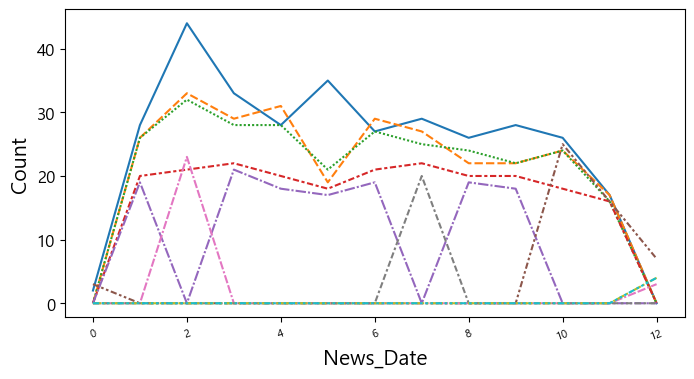

In [59]:
sns.lineplot(data=cwn_word_df_pivot_ten)
plt.legend([],[], frameon=False)

plt.xticks(fontsize = 8, rotation = 20) # x축
plt.xlabel('News_Date', fontsize = 15) # x축 이름
plt.ylabel('Count', fontsize = 15) # y축 이름

plt.show()

In [60]:
cwn_word_df_pivot_ten.date

0    2022-05-01
1    2022-06-01
2    2022-07-01
3    2022-08-01
4    2022-09-01
5    2022-10-01
6    2022-11-01
7    2022-12-01
8    2023-01-01
9    2023-02-01
10   2023-03-01
11   2023-04-01
12   2023-05-01
Name: date, dtype: datetime64[ns]

In [61]:
# 날짜별 단어들의 집계수 - bar plot 
cwn_word_df_pivot_ten_d = cwn_word_df_pivot_ten.drop(labels=['date'], axis=1)
col_names = cwn_word_df_pivot_ten_d.columns
col_names

Index(['코딩', '언어', '프로그래밍', 'PyPL', '티오베', 'AI', '개발', '12월', 'AR', '구글'], dtype='object', name='words')

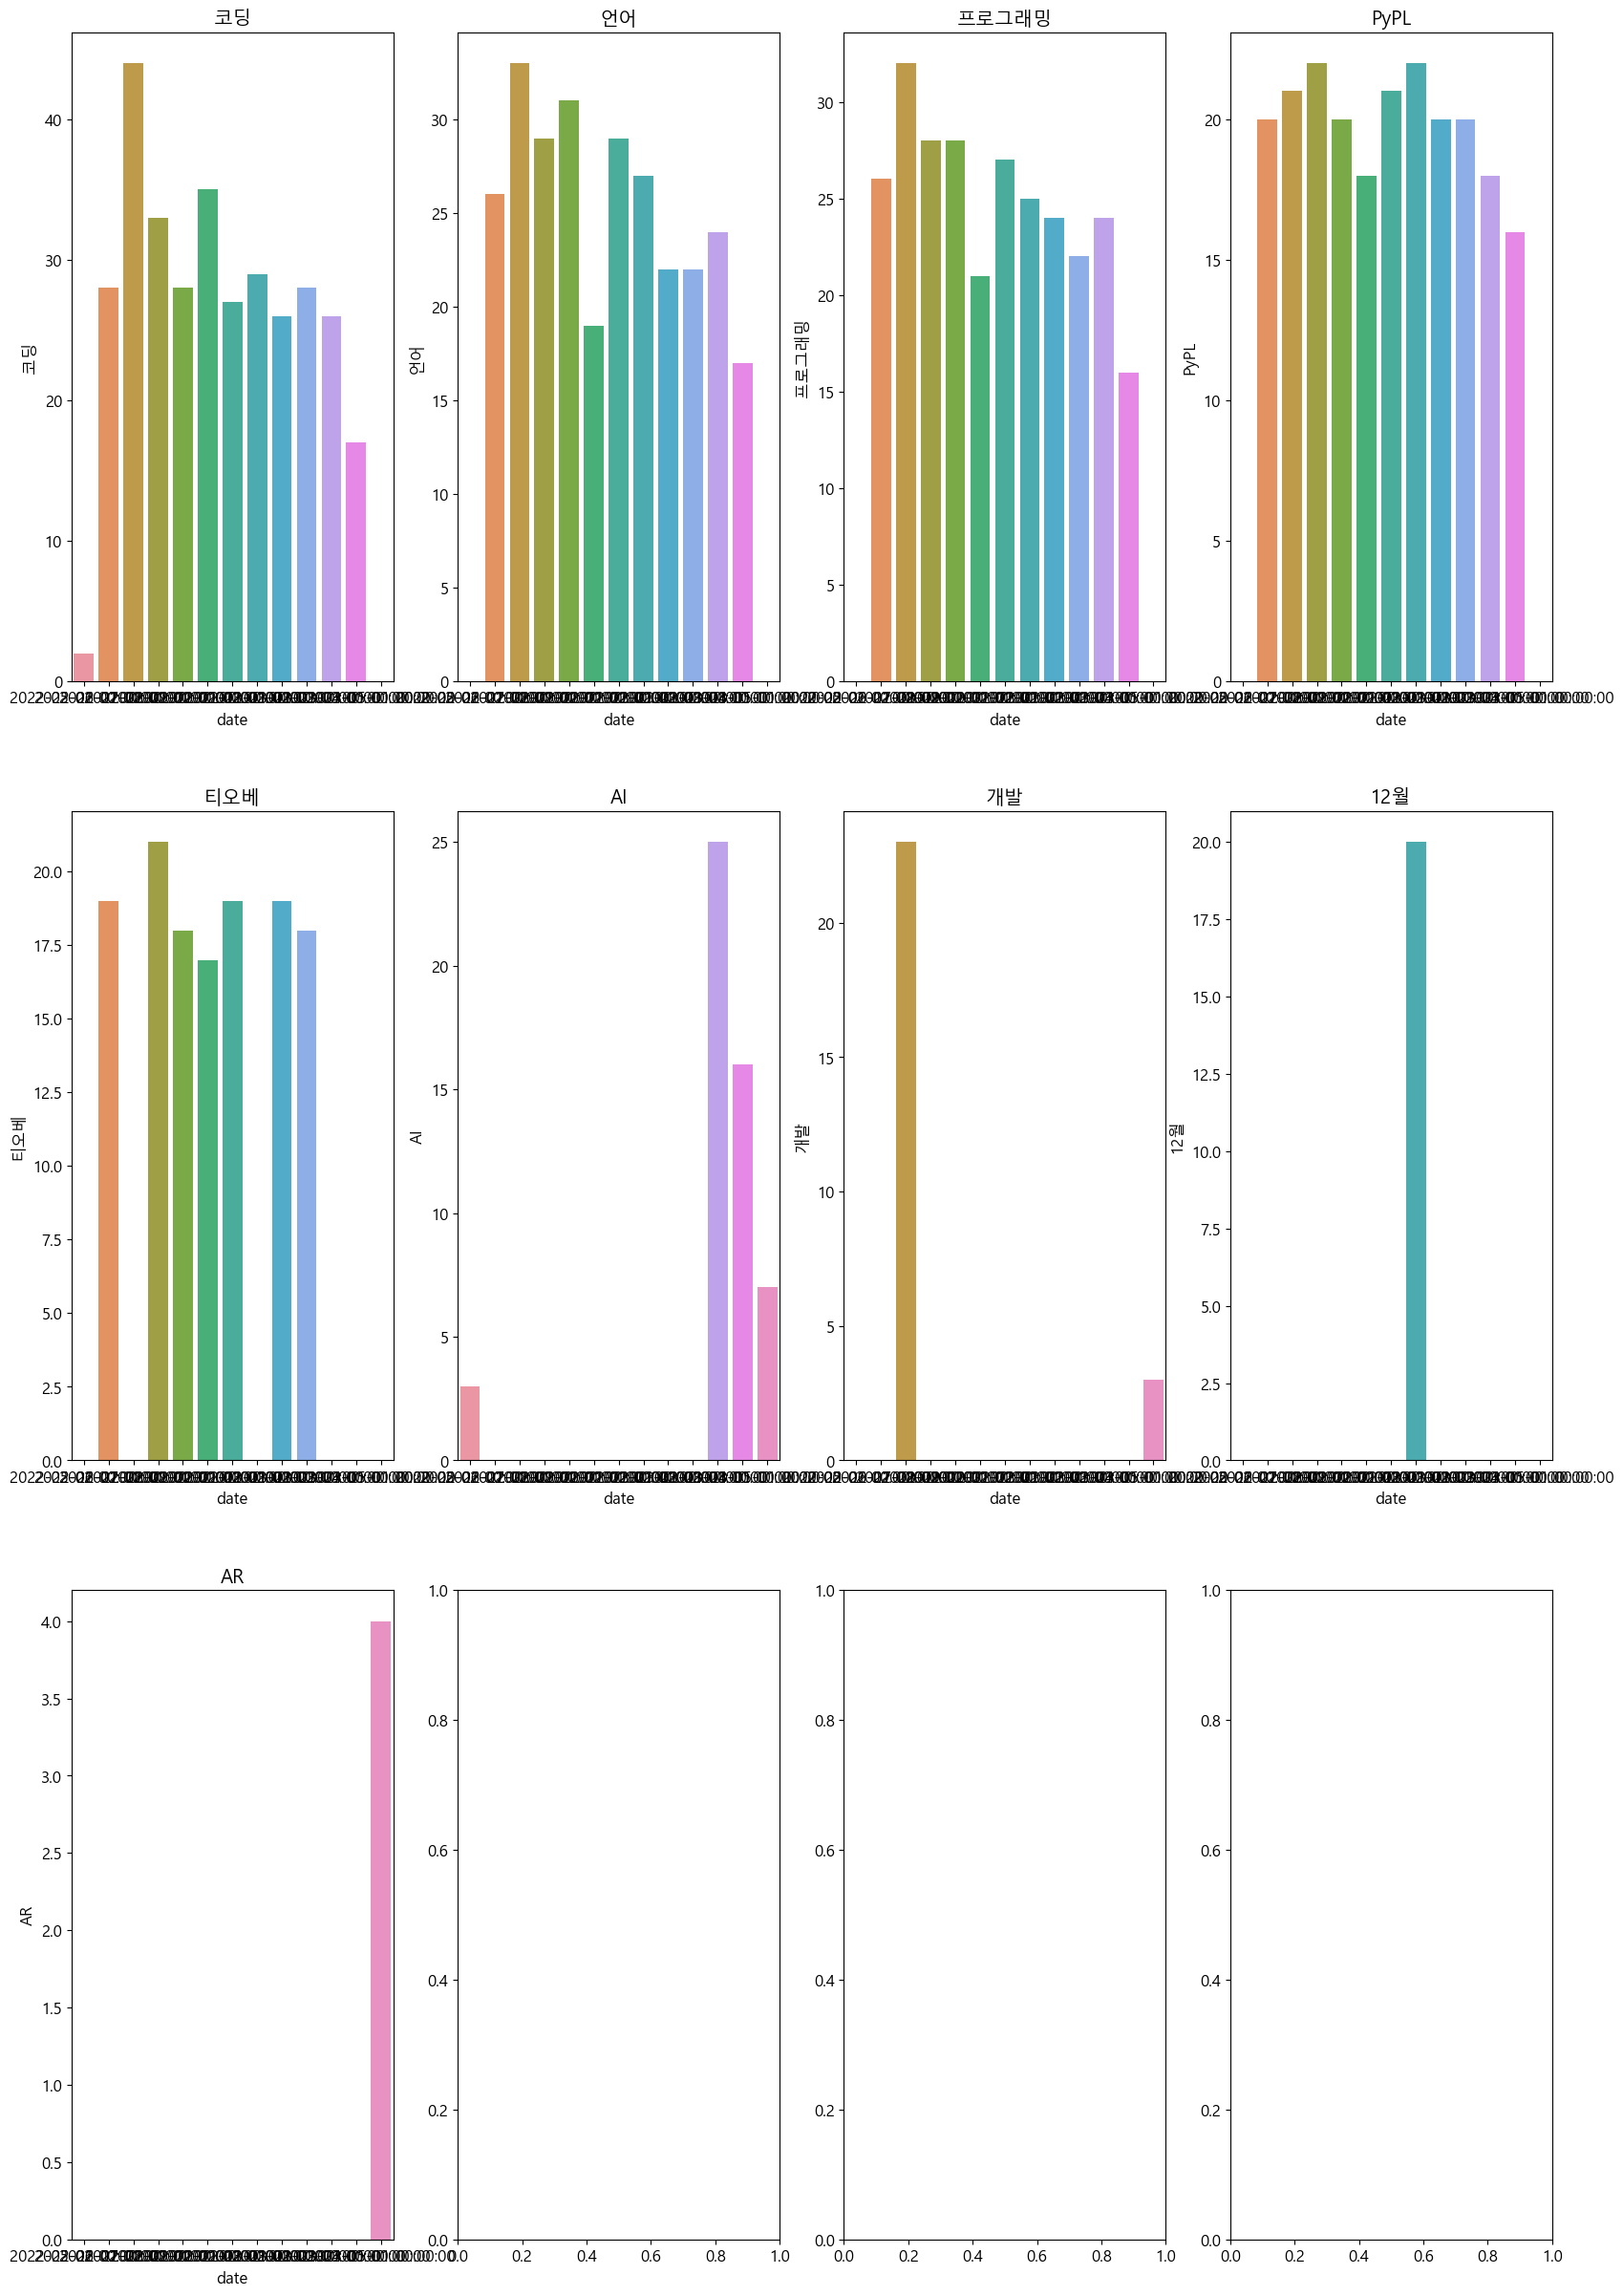

In [62]:
# 각 feature와 target 간의 분포와 관계 살펴보기
target = cwn_word_df_pivot_ten['date']

figure, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 30))
for i in range(len(col_names)-1):
    # ax.scatter(x축_data, y축_)
    fig = sns.barplot(data=cwn_word_df_pivot_ten, x=target, y=col_names[i], ax = axes[i // 4, i % 4]).set(title=col_names[i])
    # fig.set_xlabel("Date")
    # fig.set_ylabel("Count")
    

In [63]:
col_names_list = col_names.to_list()

In [64]:
cwn_word_df_pivot_sum_srt.columns

Index(['words', 0], dtype='object')

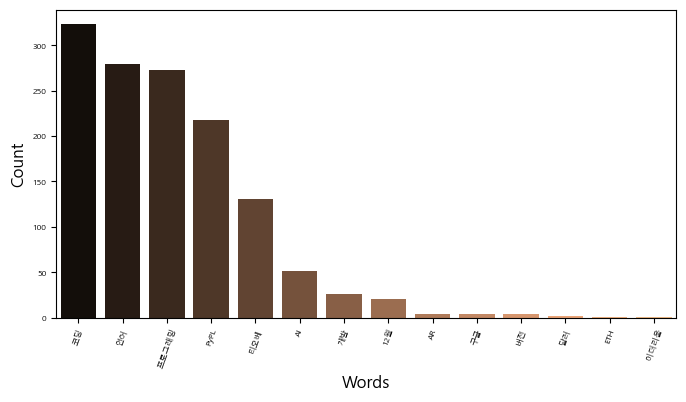

In [65]:
# 해당 기간 동안 각 단어 집계


fig = sns.barplot(data=cwn_word_df_pivot_sum_srt, x="words", y=0, palette='copper')
fig.set_xticklabels(fig.get_xticklabels(),rotation = 70)
fig.set_xlabel("Words")
fig.set_ylabel("Count")
plt.tick_params(axis='both', labelsize=6)

plt.show()
# all_word_df

In [ ]:
# # 이중 리스트를 딕트(dict)로
# # numpy array로 변환해 dataframe에 입력하기
# array_cwn = np.array(df_cwn_key_h_list)
# # array_cwn.shape
# array_cwn

# cwn_word_df = pd.DataFrame(array_cwn, columns=['date', 'words', 'cnt'])
# # cwn_word_df

# # 인덱스: date, 컬럼: words, 값: cnt
# cwn_word_df_pivot = cwn_word_df.pivot(index='date', columns='words', values='cnt')
# cwn_word_df_pivot.fillna('0', inplace=True) # 결측값 0처리
# # cwn_word_df_pivot

# cwn_word_df_pivot = cwn_word_df_pivot.apply(pd.to_numeric)

# cwn_word_df_pivot_sum_srt = cwn_word_df_pivot_sum_srt.to_frame()

# cwn_word_df_pivot_sum_srt.reset_index(drop=False)
# # cwn_word_df_pivot_sum_srt

# # konlpy.tag 호출
# from konlpy.tag import Okt
# # 집계 메소드 호출
# from collections import Counter